# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


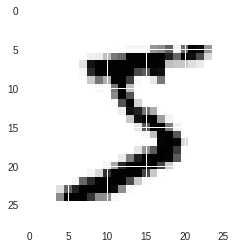

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,DepthwiseConv2D,SeparableConv2D,BatchNormalization
model = Sequential()
 
layer1 = SeparableConv2D(32,3,activation='relu', input_shape=(28,28,1),use_bias=False)
model.add(layer1)

layer2 = SeparableConv2D(64,3,activation='relu',dilation_rate=2,use_bias=False)
model.add(layer2)

layer3 = SeparableConv2D(32,3,activation='relu',dilation_rate=2,use_bias=False)
model.add(layer3)

model.add(BatchNormalization())
model.add(MaxPooling2D(2))

layer6 = SeparableConv2D(64,3,activation='relu',use_bias=False)
model.add(layer6)

layer7 = SeparableConv2D(128,3,activation='relu',use_bias=False)
model.add(layer7)

layera = Convolution2D(10,1,activation='relu',use_bias=False)
model.add(layera)

layer8 = SeparableConv2D(10,3,activation='relu',use_bias=False)
model.add(layer8)
model.add(BatchNormalization())

model.add(SeparableConv2D(10,3,use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_22 (Separab (None, 26, 26, 32)        41        
_________________________________________________________________
separable_conv2d_23 (Separab (None, 22, 22, 64)        2336      
_________________________________________________________________
separable_conv2d_24 (Separab (None, 18, 18, 32)        2624      
_________________________________________________________________
batch_normalization_7 (Batch (None, 18, 18, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
separable_conv2d_25 (Separab (None, 7, 7, 64)          2336      
_________________________________________________________________
separable_conv2d_26 (Separab (None, 5, 5, 128)         8768      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.01),
             metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.3)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),steps_per_epoch=len(X_train)/32, epochs=20,verbose=1)

Epoch 1/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2873 - acc: 0.9091
Epoch 2/20
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1215 - acc: 0.9633
Epoch 3/20
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0994 - acc: 0.9703
Epoch 4/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0873 - acc: 0.9738
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0783 - acc: 0.9769
Epoch 6/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0738 - acc: 0.9777
Epoch 7/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0678 - acc: 0.9798
Epoch 8/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0620 - acc: 0.9808
Epoch 9/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0585 - acc: 0.9828
Epoch 10/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0548 - acc: 0.9832
Epoch 11/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.025007151643821272, 0.9925]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.87471566e-11 4.83300582e-08 8.50860602e-07 2.23906213e-07
  4.69104044e-09 1.03844852e-12 1.29225794e-14 9.99998927e-01
  1.27526811e-09 9.95187932e-10]
 [3.60567992e-06 2.76762385e-05 9.99956846e-01 2.00897418e-07
  5.90212714e-08 1.35792549e-12 2.27585044e-08 1.16497595e-05
  1.08509368e-10 3.74866804e-11]
 [2.46916807e-06 9.99496102e-01 3.78730940e-04 7.63674279e-07
  6.46733388e-05 1.08387633e-06 1.62032047e-05 3.18938473e-05
  3.63645472e-06 4.38325333e-06]
 [9.99941349e-01 1.12048831e-07 9.84562030e-06 5.40843565e-08
  2.96610043e-08 3.03413508e-08 1.19822607e-05 7.02269034e-08
  1.89034449e-06 3.45632398e-05]
 [1.54085981e-07 7.45801060e-07 6.73014199e-07 3.92223232e-09
  9.99968290e-01 2.82394286e-08 1.18310902e-06 1.46332277e-05
  6.60946355e-08 1.42432064e-05]
 [1.67177987e-08 9.99984622e-01 2.29467855e-06 8.64996785e-09
  1.16313720e-06 8.60919780e-09 6.17500120e-07 1.05846839e-05
  3.08931931e-07 4.18979425e-07]
 [1.60028617e-06 1.53300025e-05 2.76201084e-04 2.29404591e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored